# CNNによる銀河の画像の分類


Googleドライブをマウントする

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


必要なライブラリを読み込む
Load the required libraries

In [2]:
%matplotlib inline
!pip install japanize-matplotlib


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=92b597657f2bdf54cd1248c88bf0c2f0be138a2c94cd0773b5bf3f15eb2f195b
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


## csvファイルの読み込み

画像ファイルのリストが記録されているcsvファイルを読み込む

In [3]:
import pandas as pd

# 画像ファイルを保存したgoogleドライブのフォルダを指定
# 自分の環境に合わせて書き換えること
# Specify the google drive folder where you saved the image files
# Rewrite it to suit your environment.

dir_path = '/content/drive/MyDrive/AI/galaxy_data/'


# 訓練用データのcsvファイルをデータフレームとして読み込む
df_train = pd.read_csv(dir_path + 'galaxy_train.csv')

# テスト用データのcsvファイルをデータフレームとして読み込む
df_test = pd.read_csv(dir_path + 'galaxy_test.csv')


訓練用データのcsvファイルの内容を表示する

In [4]:
df_train

,filename,class
0,image_train001.png,0
1,image_train002.png,1
2,image_train003.png,1
3,image_train004.png,0
4,image_train005.png,1
...,...,...
195,image_train196.png,0
196,image_train197.png,1
197,image_train198.png,1
198,image_train199.png,0


テスト用データのcsvファイルの内容を表示する

In [5]:
df_test

,filename,class
0,image_test001.png,1
1,image_test002.png,0
2,image_test003.png,0
3,image_test004.png,1
4,image_test005.png,0
5,image_test006.png,1
6,image_test007.png,1
7,image_test008.png,1
8,image_test009.png,0
9,image_test010.png,0


##Loading image data
##画像の読みこみ

In [6]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


# 訓練用画像の枚数
num_images_train = len(df_train)

# テスト用画像の枚数
num_images_test = len(df_test)


#-------------------------------------------
# 訓練用画像の読み込み
#-------------------------------------------

# データフレームをリストに変換
file_list = df_train.values.tolist()

# 訓練用データの全てのの画像を保存するための多次元配列を作成
x_train = np.zeros((num_images_train, 128, 128, 3))

# 訓練用データの全ての正解ラベルを保存するための配列を作成
y_train = np.zeros((num_images_train), dtype=int)


for i in range(num_images_train) :

  # 画像データのファイル名
  fname = dir_path + file_list[i][0]

  # 画像ファイルの読み込み
  img = load_img(fname)

  # 画像データを配列に変換
  img = img_to_array(img)

  # 画素値が0から1の範囲に収まるように正規化する
  img = img / 255.0

  # 訓練用データ全体を保存するための配列に代入
  x_train[i] = img
  y_train[i] = int(file_list[i][1])


#-------------------------------------------
# テスト用画像の読み込み
#-------------------------------------------

# データフレームをリストに変換
file_list = df_test.values.tolist()

# テスト用データの全てのの画像を保存するための多次元配列を作成
x_test = np.zeros((num_images_test, 128, 128, 3))

# テスト用データの全ての正解ラベルを保存するための配列を作成
y_test = np.zeros((num_images_test), dtype=int)


for i in range(num_images_test) :

  # 画像データのファイル名
  fname = dir_path + file_list[i][0]

  # 画像ファイルの読み込み
  img = load_img(fname)

  # 画像データを配列に変換
  img = img_to_array(img)

  # 画素値が0から1の範囲に収まるように正規化する
  img = img / 255.0

  # テスト用データ全体を保存するための配列に代入
  x_test[i] = img
  y_test[i] = int(file_list[i][1])



画像の枚数と画素数を表示する
Display the number of images and pixels

In [7]:
print("訓練用画像の枚数、画素数、チャンネル数")
print(x_train.shape)

print()

print("テスト用画像の枚数、画素数、チャンネル数")
print(x_test.shape)


訓練用画像の枚数、画素数、チャンネル数
(200, 128, 128, 3)

テスト用画像の枚数、画素数、チャンネル数
(50, 128, 128, 3)


## 訓練用画像の表示
## Display of training images

In [ ]:
fig = plt.figure(figsize= (20,10))


for i in range(0,15):

  ax = fig.add_subplot(3, 5, i+1)

  ax.set_title("正解ラベル" + str(y_train[i]))

  ax.imshow(x_train[i])

fig.tight_layout()

plt.show()

Output hidden; open in https://colab.research.google.com to view.

## モデルの作成
## Create model

In [ ]:
from tensorflow.keras.models import Sequential

# sequentialモデルの作成
model = Sequential()

## モデルへニューロンの層を追加

In [ ]:
# 追加する層をインポートしておく
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#--------------------------------------------------------
#  一組目の畳み込み層と最大値プーリング層の組み合わせ
#--------------------------------------------------------

# 講義資料を参考にし、抜けている部分を自分で書き足しなさい

# 畳み込み層の追加(フィルター数32)
model.add(Conv2D(filters=32,kernel_size=(3,3),\
                activation='relu', input_shape=(128,128,3)))

# 畳み込み層の追加(フィルター数64)
model.add(Conv2D(filters=64,kernel_size=(3,3),\
                activation='relu'))

# 最大値プーリング層の追加
model.add(MaxPooling2D(pool_size=(2,2)))


#--------------------------------------------------------
#  二組目の畳み込み層と最大値プーリング層の組み合わせ
#--------------------------------------------------------

# 講義資料を参考にし、抜けている部分を自分で書き足しなさい

# 畳み込み層の追加(フィルター数32)
model.add(Conv2D(filters=32,kernel_size=(3,3),\
                activation='relu'))

# 畳み込み層の追加(フィルター数64)
model.add(Conv2D(filters=64,kernel_size=(3,3),\
                activation='relu'))

# 最大値プーリング層の追加
model.add(MaxPooling2D(pool_size=(2,2)))



#--------------------------------------------------------
#  畳み込み層と最大値プーリング層以外の層を追加
#--------------------------------------------------------

# ドロップアウト層の追加
model.add(Dropout(0.25))

# Flatten層の追加
# 特徴量マップを1次元配列に変換する
model.add(Flatten())

# Dense層の追加
model.add(Dense(units=128, activation='relu'))

# ドロップアウト層の追加
model.add(Dropout(0.25))

# 出力層の追加
# 講義資料を参考にし、抜けている部分を自分で書き足しなさい
model.add(Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


モデルの概要を表示する

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,889,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,946,081 (26.50 MB)

 Trainable params: 6,946,081 (26.50 MB)

 Non-trainable params: 0 (0.00 B)

## モデルのコンパイル

In [ ]:
# モデルのコンパイル
# 評価指標として正解率を用いる
# 講義資料を参考にし、抜けている部分を自分で書き足しなさい

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 学習の実行

In [ ]:
epochs = 10

results = model.fit(x_train, y_train, epochs=epochs,\
                    validation_data=(x_test, y_test))


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5497 - loss: 0.9569 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5351 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss: 0.7607
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.5391 - loss: 0.6990 - val_accuracy: 0.7200 - val_loss: 0.5904
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7440 - loss: 0.5405 - val_accuracy: 0.7200 - val_loss: 0.5708
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.8440 - loss: 0.4177 - val_accuracy: 0.8400 - val_loss: 0.4446
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8471 - loss: 0.3407 - val_accuracy: 0.7800 - val_loss: 0.4991
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8345 - loss: 0.3082 - val_accuracy: 0.8400 - val_loss: 0.3947
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8881 - loss: 0.2140 - val_accuracy: 0.8600 - val_loss: 0.4443
Epoch 9/

## 学習履歴の可視化

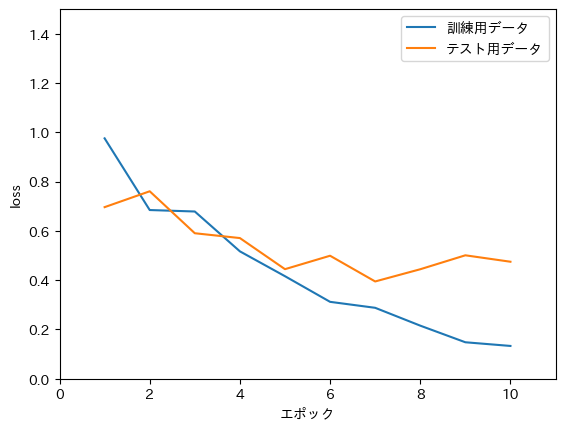

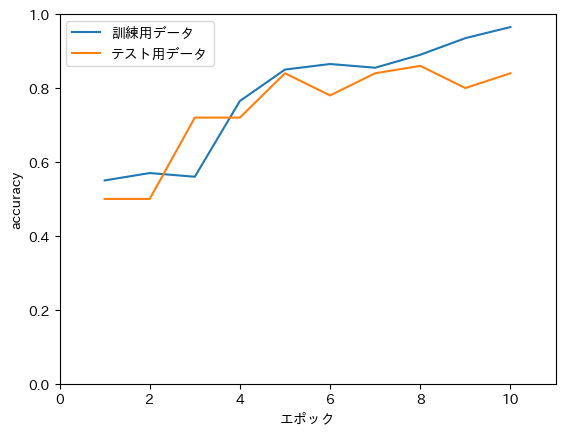

In [ ]:

# 学習のエポック数のリストを生成
epo = range(1, epochs+1)


#------------------------------
# 損失関数のグラフを表示
#------------------------------

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel("エポック")
ax.set_ylabel("loss")


ax.set_xlim(0,epochs + 1)
ax.set_ylim(0,1.5)



# 訓練用データでの損失関数のグラフ
ax.plot(epo, results.history["loss"], label="訓練用データ")

# テスト用データでの損失関数のグラフ
ax.plot(epo, results.history["val_loss"], label="テスト用データ")

ax.legend()

plt.show()


#------------------------------
# 正解率のグラフを表示
#------------------------------


fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel("エポック")
ax.set_ylabel("accuracy")

ax.set_xlim(0,epochs + 1)
ax.set_ylim(0,1)


# 訓練用データでの正解率のグラフ
ax.plot(epo, results.history["accuracy"], label="訓練用データ")

# テスト用データでの正解率のグラフ
ax.plot(epo, results.history["val_accuracy"], label="テスト用データ")

ax.legend()

plt.show()




## 学習済みモデルを用いた予測

In [ ]:
# テストデータに対する予測
# 講義資料を参考にし、抜けている部分を自分で書き足しなさい
y_pred = model.predict(x_test)


# 予測値の最初のいくつかを表示
print("予測結果の一部を表示")
print(y_pred[0:4])

print()

# 四捨五入してラベルを0か1に変換
predicted_label = np.round(y_pred)


print("予測したラベルの一部を表示")
print(predicted_label[0:4])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 425ms/step
予測結果の一部を表示
[[4.2225614e-01]
 [2.2942352e-03]
 [2.5144509e-05]
 [9.7411925e-01]]

予測したラベルの一部を表示
[[0.]
 [0.]
 [0.]
 [1.]]


In [ ]:
fig = plt.figure(figsize= (20,10))

class_names = ["渦巻銀河", "楕円銀河"]

for i in range(0,15):

  ax = fig.add_subplot(3, 5, i+1)

  ax.set_title("モデルの予測  " + class_names[int(predicted_label[i][0])] + "\n" \
               + "実際の分類  " + class_names[y_test[i]])

  ax.imshow(x_test[i])

fig.tight_layout()

plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 混同行列の表示
## Confusion matrix

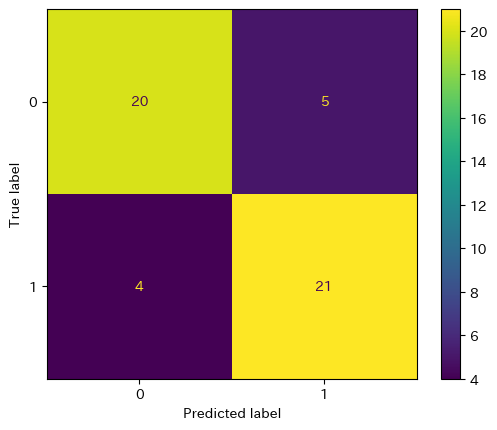

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 混同行列の計算
cm = confusion_matrix(y_test, predicted_label)

# 混同行列のヒートマップを作成
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()